In [6]:
import math
from fractions import Fraction
import numpy as np
import scipy.linalg
import sympy as sp

sp.init_printing()

x = ["1/2", "2/3"]
def to_fraction(x):
    if isinstance(x, list):
        return [to_fraction(e) for e in x] 
    else:
        return Fraction(x) 
    
def myprint(x, sep=" "):
    if isinstance(x, list) and x:
        if isinstance(x[0], list): # list of list
            m, n = len(x), len(x[0])
            widths = [max(len(str(ai[j])) for ai in x) for j in range(n)]
            rows = [sep.join(format(str(ai[j]), f">{widths[j]}") for j in range(n)) for ai in x]
            print("[" + "\n".join((" [" if i > 0 else "[") + rows[i] + "]" for i in range(m)) + "]")
        else: # list
            print("[" + sep.join(str(e) for e in x) + "]")
    else:
        print(x)

In [7]:
v_list = [1, 2, 3, 4, 5]
v_numpy = np.array([1, 2, 3, 4, 5])

print('Use list: ', v_list)
print('Use numpy: ', v_numpy)

print('The fisrt element in vector (list): ', v_list[0])
print('The last element in vector (numpy): ', v_numpy[-1])

print('Subvector (3 first elements) in vector (list): ', v_list[:3])  
print('Subvector (3 last elements) in vector (NumPy): ', v_numpy[-3:])

Use list:  [1, 2, 3, 4, 5]
Use numpy:  [1 2 3 4 5]
The fisrt element in vector (list):  1
The last element in vector (numpy):  5
Subvector (3 first elements) in vector (list):  [1, 2, 3]
Subvector (3 last elements) in vector (NumPy):  [3 4 5]


In [8]:
v_numpy.shape

In [9]:
v_row = v_numpy.reshape(1, len(v_numpy))
v_col = v_numpy.reshape(len(v_numpy), 1)

print('Row vector: \n', v_row, '\nShape: ', v_row.shape)
print('\nColumn vector: \n', v_col, '\nShape: ', v_col.shape)

Row vector: 
 [[1 2 3 4 5]] 
Shape:  (1, 5)

Column vector: 
 [[1]
 [2]
 [3]
 [4]
 [5]] 
Shape:  (5, 1)


In [17]:
from sympy.matrices import Matrix
Matrix([1, 2, 3, 4, 5])

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎢3⎥
⎢ ⎥
⎢4⎥
⎢ ⎥
⎣5⎦

In [14]:
def is_zero(x):
    # Check if a real number x is equal to 0 (or is very close to 0)
    return math.isclose(x, 0, abs_tol=1e-09)
    # |a - b| <= 0.00000000001 --> a ~ b

def create_zero_vector(n):
    return [0] * n
    # return [0 for _ in range(n)]

def is_zero_vector(v):
    return all(is_zero(vi) for vi in v)
    # If we ignore is_zero function, we can use this code:
    # return v == [0]*len(v)

In [15]:
v = create_zero_vector(5)

print(v)

print('Is zero vector: ', is_zero_vector(v))

[0, 0, 0, 0, 0]
Is zero vector:  True


In [17]:
print('v == 0', v == 0)
print('v == create_zero_vector(5)', v == create_zero_vector(5))

v == 0 False
v == create_zero_vector(5) True


In [18]:
v = np.zeros(3)

print(v)

print('Is zero vector (using built-in function), ', all(v == 0))        
print('Is zero vector (using our implemented function): ', is_zero_vector(v))

[0. 0. 0.]
Is zero vector (using built-in function),  True
Is zero vector (using our implemented function):  True


In [10]:
v = sp.zeros(3, 1)

print(v)
print('Is zero vector', v.is_zero_matrix)

Matrix([[0], [0], [0]])
Is zero vector True


In [23]:
def add_vector(v, w):
    return [vi + wi for vi, wi in zip(v, w)]

def sub_vector(v, w):
    return [vi - wi for vi, wi in zip(v, w)]

def mul_scalar_vector(alpha, v):
    return [alpha*vi for vi in v]

def equal_vector(v, w):
    return is_zero_vector(sub_vector(v, w))

In [24]:
v = [1, -3, 2]
w = [4, 2, 1]

print('Sum of 2 vectors: ', add_vector(v, w))
print('Subtraction of 2 vectors: ', sub_vector(v, w))
print('Multiplication of vector with scalar (alpha = 2): ', mul_scalar_vector(2, v))
print('Is (v - w) == (v + (-1w))?: ', equal_vector(sub_vector(v, w), add_vector(v, mul_scalar_vector(-1, w))))

Sum of 2 vectors:  [5, -1, 3]
Subtraction of 2 vectors:  [-3, -5, 1]
Multiplication of vector with scalar (alpha = 2):  [2, -6, 4]
Is (v - w) == (v + (-1w))?:  True


In [14]:
v = np.array(v)
w = np.array(w)

print('Sum of 2 vectors: ', v + w)
print('Subtraction of 2 vectors: ', v - w)
print('Multiplication of vector with scalar (alpha = 2): ', 2*v)
print('Is (v - w) == (v + (-1w))?: ', all((v - w) == (v + (-1*w))))

Sum of 2 vectors:  [5 7 5]
Subtraction of 2 vectors:  [-3 -3  1]
Multiplication of vector with scalar (alpha = 2):  [2 4 6]
Is (v - w) == (v + (-1w))?:  True


In [18]:
v = Matrix(v)
w = Matrix(w)

print('Sum of 2 vectors: ', v + w)
print('Subtraction of 2 vectors: ', v - w)
print('Multiplication of vector with scalar (alpha = 2): ', 2*v)
print('Is (v - w) == (v + (-1w))?: ', v - w == v + (-1*w)) 

Sum of 2 vectors:  Matrix([[5], [7], [5]])
Subtraction of 2 vectors:  Matrix([[-3], [-3], [1]])
Multiplication of vector with scalar (alpha = 2):  Matrix([[2], [4], [6]])
Is (v - w) == (v + (-1w))?:  True


In [5]:
print('Linear combination:')
sp.symbols('alpha')*v + sp.symbols('beta')*w

Linear combination:


NameError: name 'w' is not defined

In [12]:
def calc_inner_product(v, w):
    return sum(vi*wi for vi, wi in zip(v, w))

In [11]:
v = [1, 2, 3]
w = [4, 5, 2]

print('Inner product of 2 vectors: ', calc_inner_product(v, w))

NameError: name 'calc_inner_product' is not defined

In [31]:
def is_orthogonal(v, w):
    return is_zero(calc_inner_product(v, w))

In [32]:
v = [1, -2, 3]
w = [4, 5, 2]

print(f'Are {v} and {w} orthogonal: ', is_orthogonal(v, w))

Are [1, -2, 3] and [4, 5, 2] orthogonal:  True


In [34]:
def norm_square(v):
    return calc_inner_product(v, v)

def norm(v):
    return sp.sqrt(norm_square(v))

In [35]:
v = [1, 2, 3]

print(f'Norm of {v}: ')
norm(v)

Norm of [1, 2, 3]: 


In [36]:
def is_one(v):
    return math.isclose(v, 1)

def is_unit_vector(v):
    return is_one(norm(v))

In [37]:
one = [1, 0, 0]

print(f'Is {one} a unit vector: ', is_unit_vector(one))

Is [1, 0, 0] a unit vector:  True


In [38]:
def distance(v, w):
    return norm(sub_vector(v, w))

In [39]:
v = [1, -2, 3]
w = [4, 5, 2]

print(f'Distance between {v} and {w}:')
distance(v, w)

Distance between [1, -2, 3] and [4, 5, 2]:


In [40]:
def transpose(A):
    m, n = len(A), len(A[0]) # The size of matrix
    return [[A[i][j] for i in range(m)] for j in range(n)]

A = [[1, 2, 3], 
     [4, 5, 6]]

print('Before transposing:')
myprint(A)

print('\nAfter transposing:')
myprint(transpose(A))

Before transposing:
[[1 2 3]
 [4 5 6]]

After transposing:
[[1 4]
 [2 5]
 [3 6]]


In [41]:
A = np.array(A)

print('Before transposing:')
print(A)

print('\nAfter transposing:')
print(A.T)

Before transposing:
[[1 2 3]
 [4 5 6]]

After transposing:
[[1 4]
 [2 5]
 [3 6]]


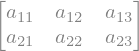

In [43]:
A = Matrix([[sp.symbols(f"a_{i}{j}") for j in range(1, 4)] for i in range(1, 3)])
A

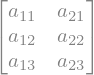

In [44]:
A.T

In [45]:
# The inner product of a row vector and a vector v
def mul_matrix_vector(A, v):
    return [calc_inner_product(ai, v) for ai in A]

# The linear combination of a column vector and a vector v
def mul_matrix_vector2(A, v):
    w = [0 for _ in range(len(v))]
    for j in range(len(v)):
        w = add_vector(w, mul_scalar_vector(v[j], [ai[j] for ai in A]))
    return w

In [46]:
A = [[1, 2, 3], [4, 5, 6]]
v = [1, 1, 1]

print('Matrix A: ')
myprint(A)
print('Vector v: ')
myprint(v)

print('Matrix-vector product Av, where A\'s rows are dot-producted with vector v') 
print(mul_matrix_vector(A, v))

print('Matrix-vector product Av, where A\'s columns are linearly combined with the corresponding coefficients from vector v')
print(mul_matrix_vector2(A, v))

Matrix A: 
[[1 2 3]
 [4 5 6]]
Vector v: 
[1 1 1]
Matrix-vector product Av, where A's rows are dot-producted with vector v
[6, 15]
Matrix-vector product Av, where A's columns are linearly combined with the corresponding coefficients from vector v
[6, 15]


In [47]:
A = np.array(A)
v = np.array(v)

print('Matrix A: ')
print(A)
print('Vector v: ')
print(v)

print('Av: ', np.matmul(A, v))

Matrix A: 
[[1 2 3]
 [4 5 6]]
Vector v: 
[1 1 1]
Av:  [ 6 15]


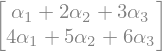

In [48]:
A = Matrix(A)
v = Matrix(sp.symbols("alpha_1 alpha_2 alpha_3"))

A * v

In [62]:
def row_switch(A, i, k):
    'di <-> dk'
    A[i], A[k] = A[k], A[i]
    
def row_mul(A, i, alpha):
    'di = anpha*di'
    A[i] = mul_scalar_vector(alpha, A[i])

def row_add(A, i, k, alpha):
    'di = di + anpha*dk'
    A[i] = add_vector(A[i], mul_scalar_vector(alpha, A[k]))
    
def is_echelon(A): # Check if a matrix is echelon
    m, n = len(A), len(A[0])
    row, col = 0, 0

    while row < m:
        while col < n and all(is_zero(A[i][col]) for i in range(row, m)):
            col += 1

        if col == n:
            return True # it's a echolon
        
        if row > 0 and A[row][col] == 0:
            return False
        
        row += 1
    
    return True

In [56]:
A = [[1, 2, 3],
     [4, 5, 6]]

print('Original matrix:')
myprint(A)

print('\nUpdate 0th row: d0 = 4d0')
row_mul(A, 0, 4)     # d0 = 4d0
myprint(A)

print('\nSwitch 0th and 1st rows: d0 <-> d1')
row_switch(A, 0, 1)  # d0 <-> d1
myprint(A)

print('\nUpdate 1st row: d1 = d1 - d0')
row_add(A, 1, 0, -1) # d1 = d1 - d0
myprint(A)

Original matrix:
[[1 2 3]
 [4 5 6]]

Update 0th row: d0 = 4d0
[[4 8 12]
 [4 5  6]]

Switch 0th and 1st rows: d0 <-> d1
[[4 5  6]
 [4 8 12]]

Update 1st row: d1 = d1 - d0
[[4 5 6]
 [0 3 6]]


In [65]:
B = [[1, 2, 3],
     [0, 2, 6],
     [0, 0, 0]]

print('Is B an echelon matrix: ', is_echelon(B))

Is B an echelon matrix:  True


In [66]:
A = Matrix(A)

print(A.is_echelon)

True


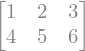

In [67]:
A = A.elementary_row_op('n->n+km', row=1, row2=0, k=1)     # d1 = d1 + d0
A = A.elementary_row_op('n<->m', row1=1, row2=0)           # d1 <-> d0
A = A.elementary_row_op('n->kn', row=0, k=Fraction('1/4')) # d0 = d0/4

A

In [68]:
A = [[1, -1],
     [2, 1]]
b = [1, 6]

x = to_fraction(['7/3', '4/3'])

Ax = mul_matrix_vector(A, x)
myprint(Ax)

print('Is Ax == b?: ', equal_vector(Ax, b))

[1 6]
Is Ax == b?:  True


In [69]:
def augmented_matrix(A, b):
    'Create the augmented matrix [A|b]'
    return [ai + [bi] for ai, bi in zip(A, b)] # Quick question: What does this code mean: ai + [bi]?

A_bar = augmented_matrix(A, b)

myprint(A_bar)

[[1 -1 1]
 [2  1 6]]


In [70]:
def Gauss_elimination(A, leading1=True):
    R = A.copy()
    m, n = len(R), len(R[0]) # The size of matrix
    
    row = col = 0
    
    while row < m:
        # Step 1
        while col < n and all(is_zero(R[i][col]) for i in range(row, m)):
            col += 1
        if col == n: # it's echelon
            break
        
        # Step 2 (select the first row that contains non-zero coefficient)
        pivot_row = row + [not is_zero(R[i][col]) for i in range(row, m)].index(True)
        row_switch(R, row, pivot_row)
        
        # Step 3 (leading 1 option)
        if leading1:
            row_mul(R, row, 1/R[row][col])
            
        # Step 4
        for i in range(row + 1, m):
            multiplier = R[i][col]/R[row][col]
            row_add(R, i, row, -multiplier) # di = di - drow * multiplier
    
        # Step 5
        row += 1
        
    return R

In [71]:
A = [[1, 3, -2,  0, 2,  0, 0],
     [2, 6, -5, -2, 4, -3, 0],
     [0, 0,  5, 10, 0, 15, 0],
     [2, 6,  0,  8, 4, 18, 0]]

print('Matrix before transforming into row echelon form (REF):')
myprint(A)

print('\nMatrix after transforming into REF (without leading 1):')
myprint(Gauss_elimination(to_fraction(A), leading1=False))

print('\nMatrix after transforming into REF (with leading 1):')
myprint(Gauss_elimination(to_fraction(A)))

Matrix before transforming into row echelon form (REF):
[[1 3 -2  0 2  0 0]
 [2 6 -5 -2 4 -3 0]
 [0 0  5 10 0 15 0]
 [2 6  0  8 4 18 0]]

Matrix after transforming into REF (without leading 1):
[[1 3 -2  0 2  0 0]
 [0 0 -1 -2 0 -3 0]
 [0 0  0  0 0  6 0]
 [0 0  0  0 0  0 0]]

Matrix after transforming into REF (with leading 1):
[[1 3 -2 0 2 0 0]
 [0 0  1 2 0 3 0]
 [0 0  0 0 0 1 0]
 [0 0  0 0 0 0 0]]


In [75]:
def back_substitution(R):
    'R is the row echelon form (REF) of the augmented matrix [A|b] of Ax = b'
    m, n = len(R), len(R[0]) # The size of matrix R
    
    # Solution vector
    sol = [None for _ in range(n - 1)]
    
    # Find the first row that contains non-zero values FROM THE BOTTOM
    row = m - 1
    while row >= 0 and all(is_zero(R[row][j]) for j in range(n)):
        row -= 1
    
    if row >= 0 and [not is_zero(R[row][j]) for j in range(n)].index(True) == n - 1:
        return None # Have no solution
    
    last_pcol = n - 1
    while row >= 0:
        pcol = [not is_zero(R[row][j]) for j in range(n)].index(True)
        for i in range(pcol, last_pcol): # Free variables
            sol[i] = sp.symbols(f"x{i + 1}")
        sol[pcol] = (R[row][n - 1] - sum(R[row][j]*sol[j] for j in range(pcol + 1, n - 1)))/R[row][pcol]
        last_pcol = pcol
        row -= 1
    
    # Add free variables from 0 to last_pcol - 1
    for i in range(0, last_pcol):
        sol[i] = sp.symbols(f"x{i + 1}")
        
    return sol

In [77]:
myprint(back_substitution(Gauss_elimination(to_fraction(A))), sep=", ")

[-3*x2 - 4*x4 - 2*x5, x2, -2*x4, x4, x5, 0]


In [78]:
A_bar = [[1, 1,  2, 9],
         [2, 4, -3, 1],
         [3, 6, -5, 0]]

R = Gauss_elimination(to_fraction(A_bar))

myprint(R)

[[1 1    2     9]
 [0 1 -7/2 -17/2]
 [0 0    1     3]]


In [79]:
sol = back_substitution(R)

if not sol:
    print('Have no solution')
else:
    myprint(sol, sep=', ')

[1, 2, 3]


In [80]:
A_bar = np.array(A_bar)

print(np.linalg.solve(A_bar[:, :-1], A_bar[:, -1]))

[1. 2. 3.]


In [81]:
A_bar = [[0, 0,  -2, 0,  7, 12],
         [2, 4, -10, 6, 12, 28],
         [2, 4,  -5, 6, -5, -1]]

R = Gauss_elimination(to_fraction(A_bar), leading1=False)
myprint(R)

myprint(Gauss_elimination(to_fraction(A_bar)))

[[2 4 -10 6  12 28]
 [0 0  -2 0   7 12]
 [0 0   0 0 1/2  1]]
[[1 2 -5 3    6 14]
 [0 0  1 0 -7/2 -6]
 [0 0  0 0    1  2]]


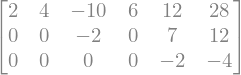

In [82]:
Matrix(A_bar).echelon_form()

In [83]:
sol = back_substitution(R)

if not sol:
    print('Have no solution')
else:
    myprint(sol, sep=', ')

[-2*x2 - 3*x4 + 7, x2, 1, x4, 2]


In [85]:
sp.linsolve(Matrix(A_bar), [sp.symbols(f"x_{i}") for i in range(1, 6)])

In [86]:
v1, v2, v3 = [1, 2, -3], [2, 5, -1], [1, 1, -8]

A = transpose([v1, v2, v3])

myprint(Gauss_elimination(to_fraction(A)))

[[1 2  1]
 [0 1 -1]
 [0 0  0]]


[[ 0.90453403]
 [-0.30151134]
 [-0.30151134]]


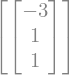

In [87]:
print(scipy.linalg.null_space(A))

Matrix(A).nullspace()

In [88]:
print(np.linalg.matrix_rank(A))

print(Matrix(A).rank())

2
2


In [89]:
v1, v2, v3, v4 = [1, 2, 1, 1], [3, 6, 5, 7], [4, 8, 6, 8], [8, 16, 12, 20]
A = [v1, v2, v3, v4]

myprint(Gauss_elimination(to_fraction(A)))

[[1 2 1 1]
 [0 0 1 2]
 [0 0 0 1]
 [0 0 0 0]]


In [92]:
Matrix(A).rowspace()

In [93]:
A = [[1, 2,  -3,  5],
     [1, 3, -13, 22],
     [3, 5,   1, -2],
     [2, 3,   4, -7]]

A_bar = augmented_matrix(A, create_zero_vector(4))
myprint(back_substitution(Gauss_elimination(to_fraction(A_bar))), ", ")

[-17*x3 + 29*x4, 10*x3 - 17*x4, x3, x4]


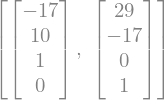

In [94]:
Matrix(A).nullspace()

In [95]:
def orthogonal_set(vs):
    return all(is_orthogonal(vs[i], vs[j]) for i in range(len(vs)) for j in range(len(vs)) if i != j)

In [96]:
def orthonormal_set(vs):
    return orthogonal_set(vs) and all(is_unit_vector(vi) for vi in vs)

In [97]:
def Gram_Schmidt(vs, normalizing=False):
    # Step 1
    Q = []
    
    # Step 2
    for vi in vs:
        # Step 3
        qi = vi
        for qj in Q:
            qi = sub_vector(qi, mul_scalar_vector(Fraction(calc_inner_product(vi, qj), calc_inner_product(qj, qj)), qj))
        
        # Step 4
        if not is_zero_vector(qi):
            Q.append(qi)
    
    # Step 5
    if normalizing:
        Q = [mul_scalar_vector(1/norm(qi), qi) for qi in Q]
    
    return Q

In [98]:
v1 = [-1, 1, -1, 1]
v2 = [-1, 3, -1, 3]
v3 = [0, 2, 0, 2]
vs = [v1, v2, v3]

Q = Gram_Schmidt(vs)
myprint(Q)

if len(Q) < len(vs):
    print('Not linearly independent!')

[[-1 1 -1 1]
 [ 1 1  1 1]]
Not linearly independent!


In [99]:
Q1 = Gram_Schmidt(vs, normalizing=True)
Q2 = scipy.linalg.orth(np.array(vs).T).T

print('Orthogonal using Gram_Schmidt')
myprint(Q1)

print('\nOrthogonal using scipy.linalg.orth')
print(Q2)

print('\nCheck orthogonality')
print(orthonormal_set(Q1), orthonormal_set(Q2))

Orthogonal using Gram_Schmidt
[[-1/2 1/2 -1/2 1/2]
 [ 1/2 1/2  1/2 1/2]]

Orthogonal using scipy.linalg.orth
[[-0.20490834  0.67676626 -0.20490834  0.67676626]
 [ 0.67676626  0.20490834  0.67676626  0.20490834]]

Check orthogonality
True True


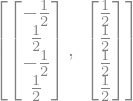

In [100]:
Matrix.orthogonalize(Matrix(v1), Matrix(v2), Matrix(v3), normalize=True)

In [101]:
v1 = [1, 1, 1]
v2 = [0, 1, 1]
v3 = [0, 0, 1]

myprint(Gram_Schmidt([v1, v2, v3]))
myprint(Gram_Schmidt([v1, v2, v3], normalizing=True))

[[   1    1   1]
 [-2/3  1/3 1/3]
 [   0 -1/2 1/2]]
[[ sqrt(3)/3  sqrt(3)/3 sqrt(3)/3]
 [-sqrt(6)/3  sqrt(6)/6 sqrt(6)/6]
 [         0 -sqrt(2)/2 sqrt(2)/2]]


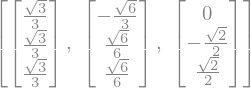

In [102]:
Matrix.orthogonalize(Matrix(v1), Matrix(v2), Matrix(v3), normalize=True)

In [103]:
def angle(v, w):
    return math.degrees(math.acos(calc_inner_product(v, w)/(norm(v)*norm(w))))

In [104]:
v = [1, 2, 3]
w = [0, -3, 2]

angle(v, w)

In [119]:
def linear_combination(vs, alphas):
    if len(vs) != len(alphas):
        raise ValueError("Length of vectors and scalars must be equal.")

    result = [0] * len(vs[0])

    for v, alpha in zip(vs, alphas):
        scaled_v = mul_scalar_vector(alpha, v)

        result = add_vector(result, scaled_v)

    return result

In [120]:
v1 = [1, 2, 3]
v2 = [4, 5, 6]
a1 = 2
a2 = 3
combo = linear_combination([v1, v2], [a1, a2])
print(combo)

[14, 19, 24]


In [124]:
def mean(vs):
    return mul_scalar_vector(1/len(vs), [sum(vi[j] for vi in vs) for j in range(len(vs[0]))])

In [125]:
print(mean([v1, v2]))

[2.5, 3.5, 4.5]


In [143]:
def acc(v):
    w = [0] * len(v)

    for i in range(len(v)):
        w[i] = sum(v[j] for j in range(0, i + 1))

    return w

def diff(v):
    w = [0] * len(v)

    w[0] = v[0]
    for i in range(1, len(v)):
        w[i] = v[i] - v[i - 1]

    return w

In [144]:
print(acc([1, 2, 3, 4, 5]))
print(diff([1, 2, 3, 4, 5]))

[1, 3, 6, 10, 15]
[1, 1, 1, 1, 1]


In [145]:
def nearest_neighbor(v, S):
    return min(S, key=lambda s: distance(v, s))

In [146]:
print(nearest_neighbor([1, 2, 3], [[1, 1, 1], [2, 2, 2], [3, 3, 3], [4, 4, 4]]))

[2, 2, 2]


In [147]:
def kNN(v, S, k=1):
    return sorted(S, key=lambda s: distance(v, s))[:k]

In [148]:
print(kNN([1, 2, 3], [[1, 1, 1], [2, 2, 2], [3, 3, 3], [4, 4, 4]], 2))

[[2, 2, 2], [1, 1, 1]]


In [159]:
def chemical_formula(mol):
    formula_str = ""
    for element, count in mol.items():  # Iterate over the dictionary
        if count > 1:
            formula_str += f"{element}{count}"
        else:
            formula_str += element
    return formula_str

In [161]:
formula = [('H', 2), ('O', 1)]
mol_dict = dict(formula)  # Convert list of tuples to dictionary
mol = chemical_formula(mol_dict)
print(mol)  # Output: H2O

H2O


In [162]:
from IPython.display import Latex

mol = chemical_formula(dict([('H', 2), ('O', 1)]))
# will be similar to the following
mol = r'\text{H}_2\text{O}'

print(mol)
Latex('$' + mol + '$')

\text{H}_2\text{O}


<IPython.core.display.Latex object>

In [164]:
mol = chemical_formula(dict([('Al', 2), ([('S', 1), ('O', 4)], 3)]))
# will be similar to the following
mol = r'\text{Al}_2(\text{S}\text{O}_4)_3'

print(mol)
Latex('$' + mol + '$')

TypeError: unhashable type: 'list'